In [1]:
import functions as fct
import pandas as pd
import dynamics as dyn
import numpy as np
import dask
from cluster import new_launch_cluster
import graphics as gx

path = "./results/parameter_space/test/"

dic_default_value = {
    "nb_banks": 50,
    "initial_deposits_size": 1e-5,
    "alpha_init": 0.01,
    "alpha": 0.01,
    "beta_init": 0.5,
    "beta_reg": 0.5,
    "beta_star": 0.5,
    "beta_new": 0.5,
    "gamma_init": 0.03*10,
    "gamma": 0.03,
    "gamma_star": 0.03*10, 
    "gamma_new": 0.03*10, 
    "collateral_value": 1.0,
    "initialization_method": "pareto",
    "alpha_pareto": 1.3,
    "shocks_method": "non-conservative",
    "shocks_law": "normal-mean-reverting",
    "shocks_vol": 0.01,
    "LCR_mgt_opt": True,
    "min_repo_trans_size": 1e-8,
    "loan_tenor": 5000, # for money creation 
    "new_loans_vol":0,
    "new_loans_mean":1000000e-2/250,
    "end_repo_period":False,
    "nb_steps": int(5e3),
    "path_results": f"{path}runs/",
    "dump_period": int(5e3),
    "plot_period": int(1e2),
    "cp_option": True,
    "heavy_plot": False,  # False to avoid the number of linux node to explode
}

# special dictionary of parameters ranges 
dic_range_special = {
    # "nb_banks": np.arange(155, 260, 5),  # 10 to 260
    # "initial_deposits_size": np.logspace(-5, 3, num=500),
    "initial_deposits_size": [1e-5 for _ in range(500)],
    # "alpha_init": np.arange(0, 0.3, 0.01),
    # "beta_init": np.arange(0, 1, 0.02),
    # "beta_reg": np.arange(0.01, 1, 0.01),
    # "alpha_pareto": np.logspace(0, 1, num=50),
    # "shocks_vol": np.arange(0, 0.30, 0.0010),
    # "min_repo_trans_size": np.logspace(-16, 2, num=50),
}

# general dictionary of parameters ranges
dic_range_general = {
    "nb_banks": np.arange(1, 3),
    "initial_deposits_size": np.logspace(-9, 3, num=50),
    "alpha_init": np.arange(0, 1, 0.1),
    "beta_init": np.arange(0, 1, 0.05),
    "beta_reg": np.arange(0.01, 0.03, 0.01),
    "alpha_pareto": np.logspace(0, 1, num=3),
    "shocks_vol": np.arange(0, 0.30, 0.0025),
    "min_repo_trans_size": np.logspace(-16, 2, num=3),
}

# define the dictionary to be used for the ranges
dic_range = dic_range_special

/mnt/live/user/vlecoz/Secured_interbank_network/network.py:485: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (


# run parameter space analysis

In [2]:
# initialize the path
# fct.delete_n_init_path(path)

# build list of the dic_args to be tested
list_dic_args = fct.build_args(dic_default_value, dic_range)

# open a cluster
client, cluster = new_launch_cluster(
    task_memory=19,
    job_walltime="2:00:00",
    max_cpu=fct.get_nb_runs(dic_range),
)

# run with dask distributed
dld_obj = [
    dask.delayed(dyn.single_run)(**dic_args) for dic_args in list_dic_args
]
futures = client.compute(dld_obj)


Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://10.70.211.9:8787/status,
Dashboard: http://10.70.211.9:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.70.211.9:35863,Workers: 0
Dashboard: http://10.70.211.9:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
for i, future in enumerate(futures):
    if future.status == "finished":
        print(i, future.result())

0 None
1 None
2 None
3 None
4 None
5 None
6 None
7 None
8 None
9 None
10 None
11 None
12 None
13 None
14 None
15 None
16 None
17 None
18 None
19 None
20 None
21 None
22 None
23 None
24 None
25 None
26 None
27 None
28 None
29 None
30 None
31 None
32 None
33 None
34 None
35 None
36 None
37 None
38 None
39 None
40 None
41 None
42 None
43 None
44 None
45 None
46 None
47 None
48 None
49 None
50 None
51 None
52 None
53 None
54 None
55 None
56 None
57 None
58 None
59 None
60 None
61 None
62 None
63 None
64 None
65 None
66 None
67 None
68 None
69 None
70 None
71 None
72 None
73 None
74 None
75 None
76 None
77 None
78 None
79 None
80 None
81 ***ERROR***: leverage ratio not above its regulatory level for one or several banks. Plot and stop simulation.
82 None
83 None
84 None
85 None
86 None
87 None
88 None
89 None
90 None
91 None
92 None
93 None
94 None
95 None
96 None
97 None
98 None
99 None
100 None
101 None
102 None
103 None
104 None
105 None
106 None
107 None
108 None
109 None
110 None
111 N

In [6]:
client.shutdown()

In [ ]:
dyn.single_run(*dic_default_value.values())

# collect results

In [4]:
# collect results into df_network_sensitivity
df_network_sensitivity = fct.get_df_network_sensitivity(dic_default_value["path_results"])

100%|██████████| 1/1 [00:42<00:00, 42.92s/it]


<AxesSubplot: >

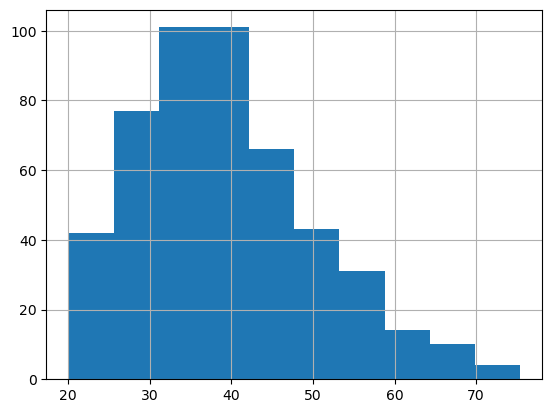

In [8]:
(df_network_sensitivity["borrowings ov. deposits tot. network"]).hist()

<AxesSubplot: >

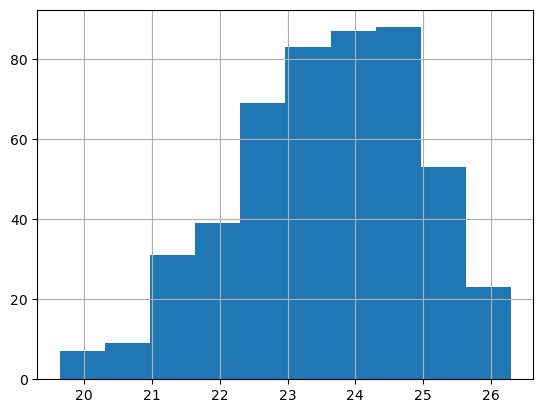

In [5]:
(df_network_sensitivity["own funds tot. network"]/df_network_sensitivity["total assets tot. network"]*100).hist()

<AxesSubplot: >

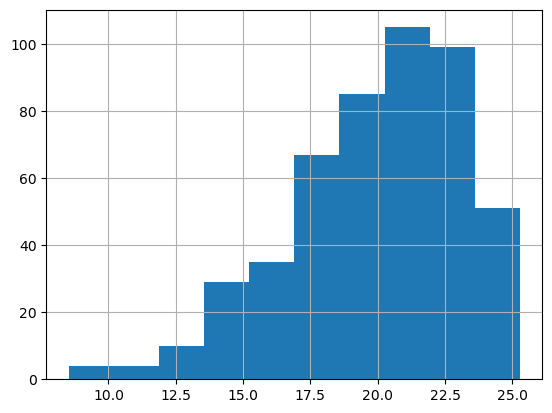

In [6]:
df_network_sensitivity["leverage ratio av. network"].hist()

# plot results

In [10]:
# plot the sensitivity
df_network_sensitivity = pd.read_csv(f"{dic_default_value['path_results']}df_network_sensitivity.csv", index_col=(0,1))
gx.plot_all_sensitivities(df_network_sensitivity,path=path)

100%|██████████| 20/20 [00:10<00:00,  1.84it/s]
